# 1. Initial Data Analysis: #
## 1.1 Data Preparation ##
### Import Library ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pre set values for max cols and chart size

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.rcParams["figure.figsize"] = (15,5)

###  Import Data ###

In [3]:
# Read Input feature and target value csv raw file from github 
input_feature_url = 'https://raw.githubusercontent.com/dhavalkakdiya/Earthquake_EDA/main/input_features.csv'
target_value_url = 'https://raw.githubusercontent.com/dhavalkakdiya/Earthquake_EDA/main/target_values.csv'
data = pd.read_csv(input_feature_url, index_col = 'building_id')
target = pd.read_csv(target_value_url)

In [4]:
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


###  Shape of Data ###

In [5]:
# Chaeck size of data using 'shape'
nrow, ncol = data.shape
print(f'Input feature data frame have {nrow} Rows and {ncol} Columns')
nrow, ncol = target.shape
print(f'Target values data frame have {nrow} Rows and {ncol} Columns')

Input feature data frame have 260601 Rows and 38 Columns
Target values data frame have 260601 Rows and 2 Columns


- Both the data set have 260601 records

## 1.2 Description of Data ##


In [6]:
# Details of Input_feature data using info() function.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

- There are 39 columns in Input_feature data set,and each row contains information about buildings structure, its geolocation information, legal ownership etc. 
- Building_id is unique identifier.

__The Given data set can be divided into following parts :__
- Building location and info
- Demographic info : Count of Families, Legal ownership
- Building construction info : land surface condition, foundation type, roof type, ground floor type, other floor type, position 
- Building Plan configuration :
- Building Structure info
- Building's Secondary use

__Variables containg Numerical data__ :

   -  __geo_level_1_id__, __geo_level_2_id__, and __geo_level_3_id__ : type(int) : Indicates the geographic area where the building is located, starting from the largest level (level 1) to specific sub-area (level 3). Possible values: (level 1: 0-30), (level 2: 0-1427), (level 3: 0-12567).
   - __count_floors_pre_eq__ : type(int) : The number of floors in the building before the earthquake.
   - __age__ : type(int) : Age (Year) of building.
   - __area_percentage__ : type(int) : Normalized area of building.
   - __height_percentage__ : type(int) : Normalized height of building.
   - __count_families__ : type(int) : The number of families who live in the building.
    
__Variables containg Categorical data__ :

   - __land_surface_condition__ : type(categorical) : The condition of the ground surface where the building is built. Possible value : n, o, t.
   - __foundation_type__ : type(categorical) : The type of foundation used in constructing the building. Possible values: h, i, r, u, w.
   - __roof_type__ : type(categorical) : The type of roof used in constructing the building. Possible values: n, q, x
   - __ground_floor_type__ : type(categorical) : The type of floor used on the ground floor of the building. Possible values: f, m, v, x, z.
   - __other_floor_type__ : type(categorical) : The type of floor used other than on the ground floor of the building. Possible values: j, q, s, x.
   - __position__ : type(categorical) : Position of the building. Possible values: j, o, s, t.
   - __plan_configuration__ : type(categorical) : Buildings configure plans. Possible values: a, c, d, f, m, n, o, q, s, u.
   - __legal_ownership_status__ : type(categorical) : The legal ownership of the land on which the building is constructed.  Possible values: a, r, v, w.
    
__Variables containg Binary data__ :

   - __has_superstructure_adobe_mud__ : type(binary) : Variable indicates that if the superstructure is made of Adobe/Mud
   - __has_superstructure_mud_mortar_stone__ : type(binary) : Variable indicates that if the superstructure is made of Mud Mortar - Stone.
   - __has_superstructure_stone_flag__ : type(binary) : Variable indicates that if the superstructure is made of Stone.
   - __has_superstructure_cement_mortar_stone__: type(binary) : Variable indicates that if the superstructure is made of Cement Mortar - Stone.
   - __has_superstructure_mud_mortar_brick__ : type(binary) : Variable indicates that if the superstructure is made of Mud Mortar - Brick.
   - __has_superstructure_cement_mortar_brick__ : type(binary) : Variable indicates that if the superstructure is made of cement Mortar - Brick.
   - __has_superstructure_timber__ : type(binary) : Variable indicates that if the superstructure is made of timber.
   - __has_superstructure_bamboo__ : type(binary) : Variable indicates that if the superstructure is made of bamboo.
   - __has_superstructure_rc_non_engineered__ : type(binary) : Variable indicates that if the superstructure is made of non-engineered reinforced concrete.
   - __has_superstructure_rc_engineered__ : type(binary) : Variable indicates that if the superstructure is made of engineered reinforced concrete.
   - __has_superstructure_other__ : type(binary) : Variable indicates that if the superstructure is made of another material.
   - __has_secondary_use__ : type(binary) : Variable indicates that if building is used for secondary purposes.
   - __has_secondary_use_agriculture__ : type(binary) : Variable indicates that if building is used for agriculture.
   - __has_secondary_use_hotel__ : type(binary) : Variable indicates that if building is used for hotel.
   - __has_secondary_use_rental__ : type(binary) : Variable indicates that if building is used for rental.
   - __has_secondary_use_institution__ : type(binary) : Variable indicates that if building is used for insitution.
   - __has_secondary_use_school__ : type(binary) : Variable indicates that if building is used for school.
   - __has_secondary_use_industry__ : type(binary) : Variable indicates that if building is used for industry.
   - __has_secondary_use_health_post__: type(binary) : Variable indicates that if building is used for health post.
   - __has_secondary_use_gov_office__ : type(binary) : Variable indicates that if building is used for government office.
   - __has_secondary_use_use_police__ : type(binary) : Variable indicates that if building is used for police.
   - __has_secondary_use_other__ : type(binary) : Variable indicates that if building is used for other purposes.
    

In [7]:
# Details of Target data using info() function.
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


- There are 260601 record in target data set.
- Building_id is unique identifier.
- damage_grade : Variable represents the damage level of a building affected by an earthquake. 
- There are 3 levels of damage :
    - 1: Represents light damage
    - 2: Represents moderate damage
    - 3: Represents high damage (almost completely destroyed)

## 1.3 Data Transformation ##


### Data merging ###

In [8]:
# data merge on building_id
data = data.merge(target, how='left', on='building_id')

In [9]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


### Check Null and Duplicate Data ###

In [10]:
# To see if there is empty data, we can use .isnull () and .sum () to see if there is empty data in each column of data.
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

- No empty data

- To remove duplicate data, you can use .drop_duplicates (). Because the building_id column that states the building id must be unique, the process of disposing of data in that column will be performed if there is duplicate data.

In [11]:
# check duplicate data
data.duplicated().sum()

0

- There is no duplication in data set

In [12]:
# check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

- There are 32 columns of data of type integer and 8 columns of type object.

### Summary statistics ###

In [13]:
# Summary Data
data.describe(include = 'all')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,260601,260601,260601,260601,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,3,5,4,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,n,f,q,s,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,182842,209619,165282,202090,250072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,NaN,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,NaN,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


- Based on the descriptive statistics above :
    - it can be seen that the average number of floors in the building is 2 floors. 
    - The average age of the building is 26.53 years and has a very old building which is 995 years. This very old building can affect the average age of the building. 
    - The average building area is 8.01 and building height is 5.43.

## 1.4 Characteristics of dataset: ###

### Top 8 rows of Data set ###

In [14]:
data.head(8)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


### Bottom 8 rows of Data set ###

In [15]:
data.tail(8)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260593,226421,8,767,8613,2,5,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
260594,159555,27,181,1537,6,0,13,12,t,r,n,f,x,j,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260595,827012,8,268,4718,2,20,8,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0,3


### Frequency histogram ###

In [16]:
# function to view frequency histograms which we will use across this file
# for categorical vaiable
def hist_frq(df, feature):
    '''
    Function draws histogram and percentage of unique values of feature.
    
    Parameteres :
    ------------
    df : unquoted str
         dataframe name
         
    feature : str
              series label
    
    Returns :
    --------
    print unique value frequency and draw histogram representation of feature
    '''
    print(round(data[feature].value_counts(normalize=True)*100,2))
    
    figure, axs = plt.subplots()
    #axs[0].boxplot(df[feature])
    #axs[0].set_title('{} Boxplot'.format(feature))
    axs.hist(df[feature])
    axs.set_title('{} Histogram'.format(feature))
    plt.subplots_adjust(bottom=0.15, wspace=0.25);
    return

# for numericel varibale
def box_hist(df, feature):
    '''
    Function draws boxpot and histogram of feature.
    
    Parameteres :
    ------------
    df : unquoted str
         dataframe name
         
    feature : str
              series label
    
    Returns :
    --------
    Boxplot and histogram representation of feature
    '''
    #print(round(data[feature].value_counts(normalize=True)*100,2))
    
    figure, axs = plt.subplots(1,2)
    axs[0].boxplot(df[feature])
    axs[0].set_title('{} Boxplot'.format(feature))
    axs[1].hist(df[feature])
    axs[1].set_title('{} Histogram'.format(feature))
    plt.subplots_adjust(bottom=0.15, wspace=0.25)
    
    return

### - *age* ###

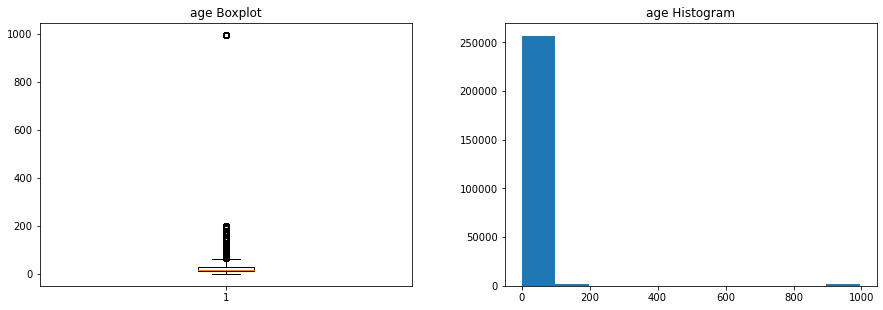

In [17]:
box_hist(data, 'age')

- Majority builiding are below age 100, and there are some old building around 950-1000. Older buildings may not have the same steel and concrete reinforcements as newer buildings which will directly reflect on the degree of earthquake damage to the building.

### - *area_percentage* ###

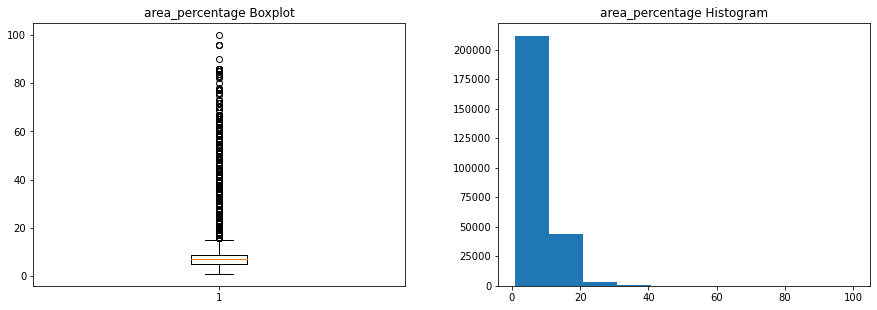

In [18]:
box_hist(data, 'area_percentage')

- Majority of buildings have area percentage between 1 to 20, so analyse time we can consider building within this range only. 

### - *height_percentage* ###

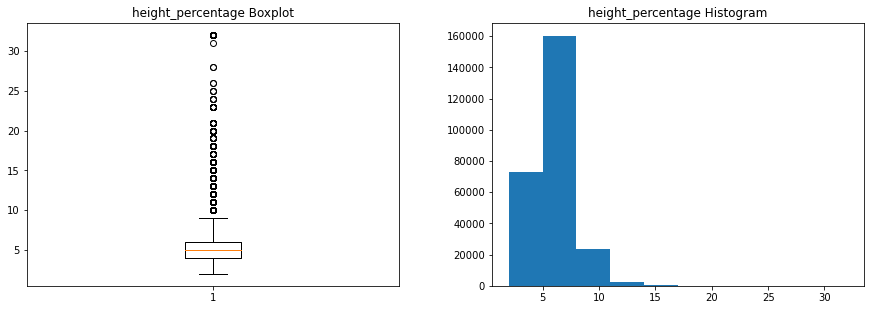

In [19]:
box_hist(data, 'height_percentage')

- There are few outliners and most buildings have height percentage between 2 to 10.

### - *count_families* ###

1    86.77
0     8.01
2     4.33
3     0.69
4     0.15
5     0.04
6     0.01
7     0.00
9     0.00
8     0.00
Name: count_families, dtype: float64


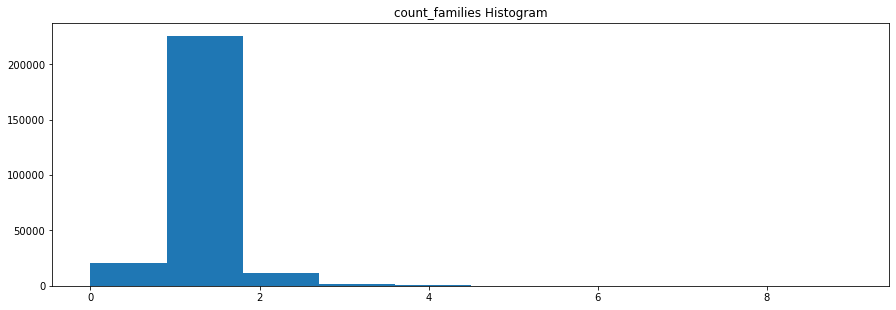

In [20]:
hist_frq(data, 'count_families')

- Around 87% buildings have 1 family and 8% building have 0 families.

### - *count_floors_pre_eq* ###

2    60.10
3    21.34
1    15.52
4     2.08
5     0.86
6     0.08
7     0.01
8     0.00
9     0.00
Name: count_floors_pre_eq, dtype: float64


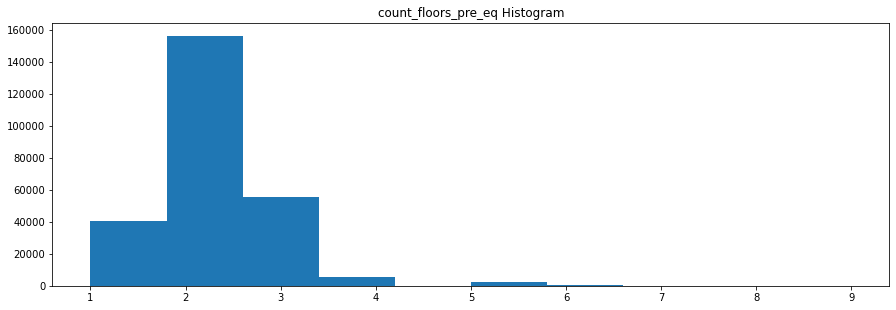

In [21]:
hist_frq(data, 'count_floors_pre_eq')

- Majority of the buildings about 60%, and have 2 floors. 
- Nearly 22% of the buildings in the dataset have 3 floors, while 15% are single floor structures. 
- About 3% of all buildings in the dataset are 4 floors or taller. 
- Shorter buildings tend to be stiffer than taller buildings and thus a prone to greater earthquake damage

### - *land_surface_condition* ###

t    83.18
n    13.63
o     3.19
Name: land_surface_condition, dtype: float64


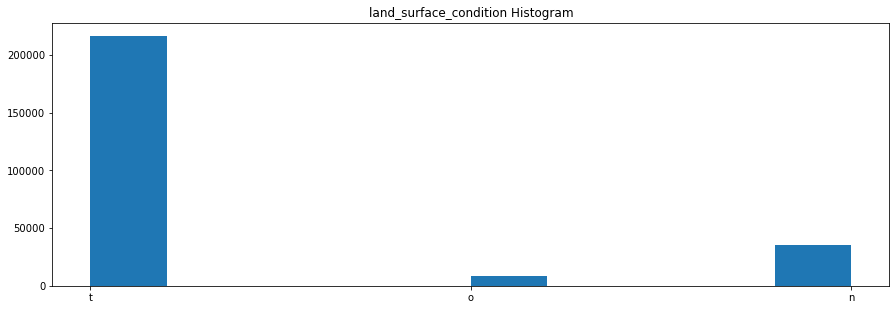

In [22]:
hist_frq(data, 'land_surface_condition')

- 83% building have __'t'__ type surface in which building were build, followed by __'n'__ type land surface and type __'o'__ land surface.

### - *foundation_type* ###

r    84.11
w     5.80
u     5.47
i     4.06
h     0.56
Name: foundation_type, dtype: float64


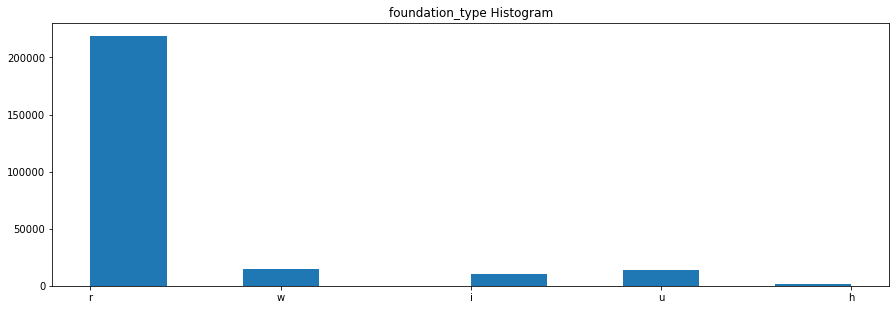

In [23]:
hist_frq(data, 'foundation_type')

- There are only 0.5% building have __'h'__ type foundation
- 84% buildings have __'r'__ type foundation.

### - *roof_type* ###

n    70.16
q    23.63
x     6.21
Name: roof_type, dtype: float64


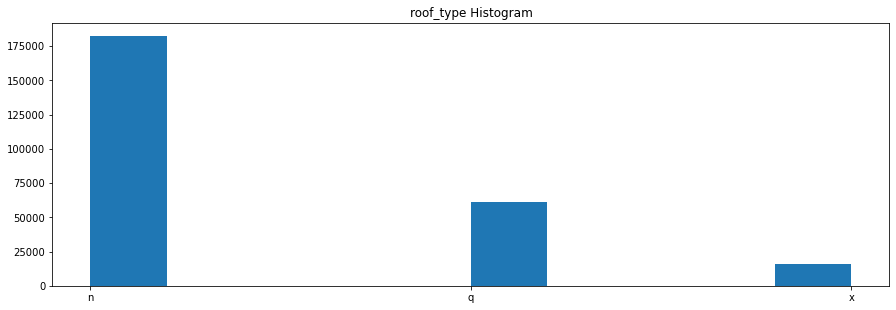

In [24]:
hist_frq(data,'roof_type')

- Majority buildings aroud 70% have __'n'__ type roof structure followed by __'q'__ type roof.

### - *ground_floor_type* ###

f    80.44
x     9.55
v     9.44
z     0.39
m     0.19
Name: ground_floor_type, dtype: float64


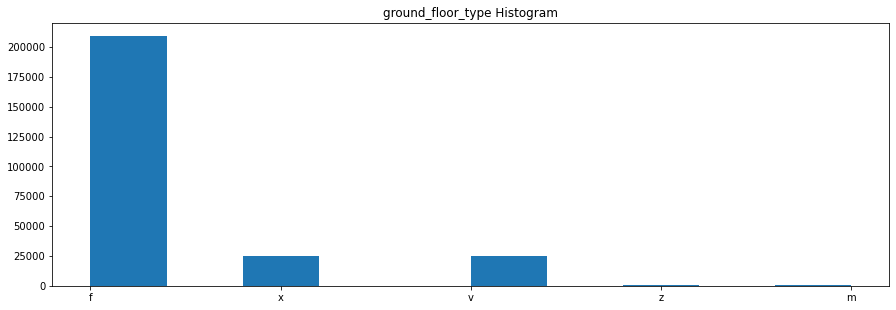

In [25]:
hist_frq(data,'ground_floor_type')

### - *position* ###

s    77.55
t    16.46
j     5.10
o     0.90
Name: position, dtype: float64


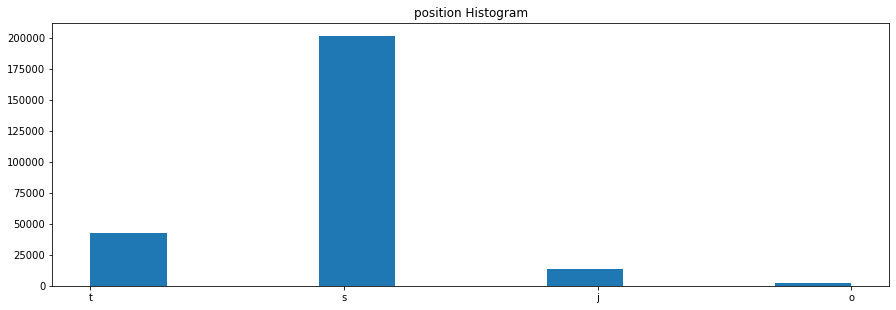

In [26]:
hist_frq(data,'position')

- Nearly 78% buildings positioned in __'s'__ type. 17% buildings have __'t'__ type postions.

d    95.96
q     2.18
u     1.40
s     0.13
c     0.12
a     0.10
o     0.06
m     0.02
n     0.01
f     0.01
Name: plan_configuration, dtype: float64


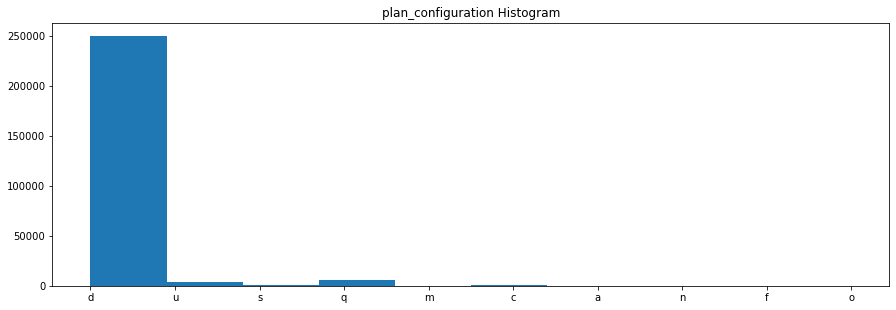

In [27]:
hist_frq(data,'plan_configuration')

- Majority of buildings have __'d'__ type plan configuration which is around 96%.


### Correlation ###

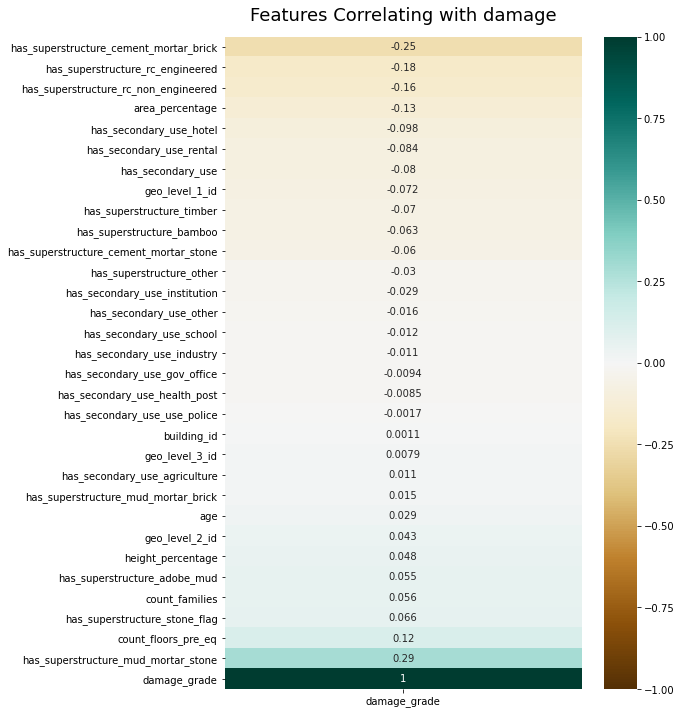

In [28]:
# Check correlation of all the features with damage to see if something stands-out explicitly
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['damage_grade']].sort_values(by='damage_grade', ascending=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with damage', fontdict={'fontsize':18}, pad=16);

# 2. Exploratory Data Analysis (EDA) #

In [29]:
data['damage_grade'] = data['damage_grade'].astype('category')
data['damage_grade'] = data['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})

Medium    56.89
High      33.47
Low        9.64
Name: damage_grade, dtype: float64


Text(0, 0.5, 'Counts')

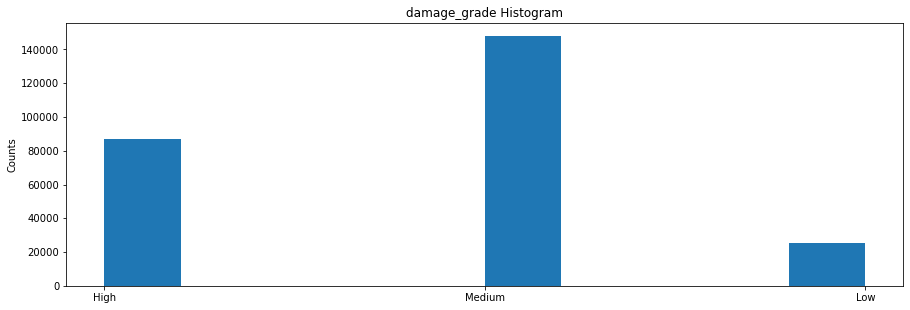

In [30]:
# Histogram plot for damage grade
hist_frq(data, 'damage_grade')
plt.ylabel("Counts")

- it can be seen that the number of buildings with a medium level of damage is the most at 56.89%, followed by buildings with a high level of damage at 33.47% and finally buildings with a low level of damage at 9.64%.

## 2.1 Research Question ##

## Q1  : Which geographical region is greatly affected by the earthquake? ##

### Histogram on geo_level_1 ###

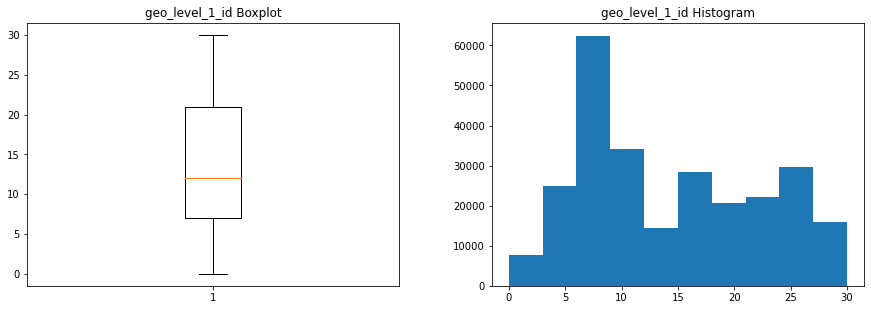

In [31]:
box_hist(data, 'geo_level_1_id')

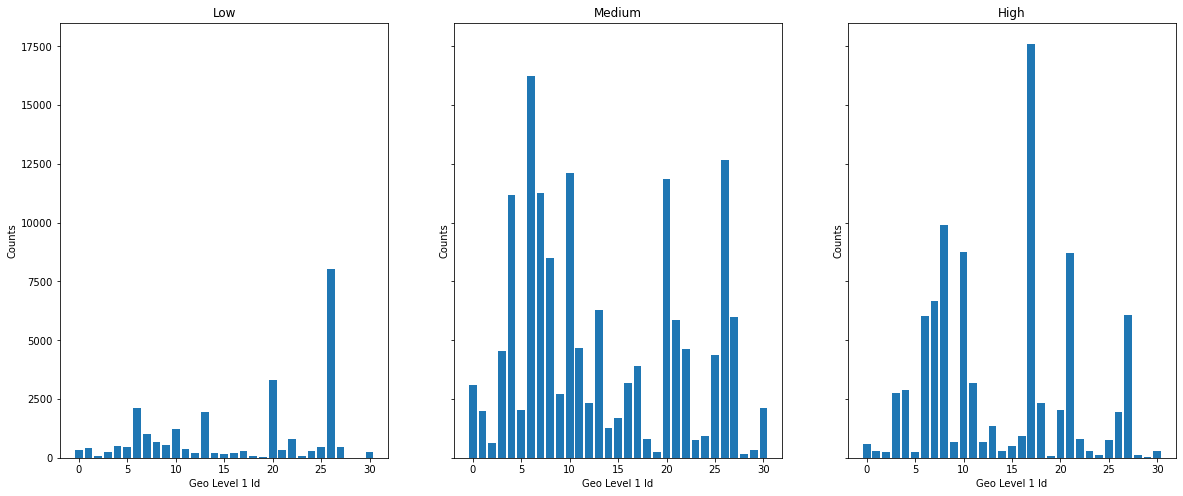

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (20,8), sharex=True, sharey=True)

damage = ['Low','Medium','High']

for i, val in enumerate(damage):
    axes[i].bar(data[data['damage_grade'] == val]['geo_level_1_id'].value_counts().index, data[data['damage_grade'] == val]['geo_level_1_id'].value_counts().values)
    axes[i].set_title(val)
    axes[i].set_xlabel("Geo Level 1 Id")
    axes[i].set_ylabel("Counts")


- The majority of the buildings were damaged at level 2, with level 3 damage following.
- The Geo Level 1 id 5 through 10 have a relatively large amount of damage occurrences.
- Id 17 caught the most hits and sustained the greatest damage.
- The distribution of damage by region is not conclusive which require further investigation. Due to a variety of factors, it is impossible to make reliable inferences. Like, the higher damage level and occurrences due to factors like being close to the seismic epicenter, the properties of the buildings or simply because those areas had greater density of buildings.

## Q2 : Are the structures with more age are effectively impacted by earthquakes? ##

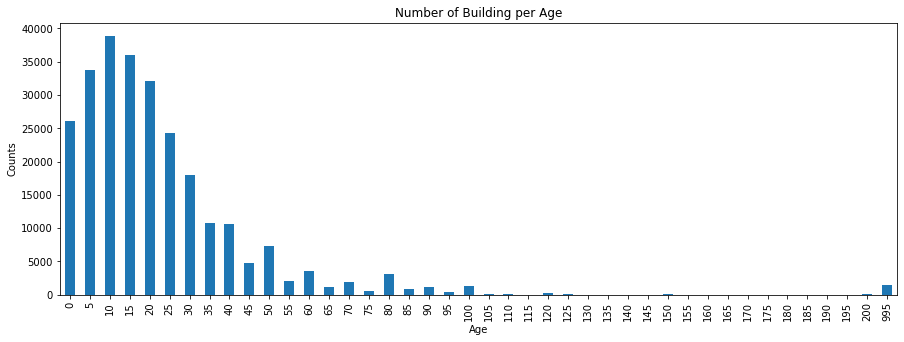

In [33]:
# Bar plot
fig, ax = plt.subplots()

ax.set_title("Number of Building per Age")
ax.set_xlabel("Age")
ax.set_ylabel("Counts")
data['age'].value_counts().sort_index().plot.bar()
plt.show()


 - There are nearly 25000 building with zero age. (Either data missing or new construction)
 - small portions of buildings over age 100. Can be treated as outliners.

In [34]:
# Percentage of Buiidng whose age over 100
(data[data['age']>100]['age'].count()/data['age'].count()) * 100

0.8150390827356764

- 0.8 % of records building whose age is over 100. so we can neglect that as outliners. we can find out outliners using Box plot also.

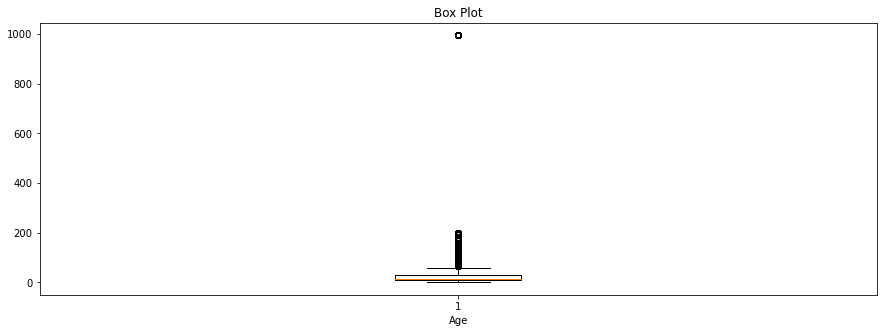

In [35]:
# box plot to find out outliners
fig1, ax = plt.subplots()
ax.set_title('Box Plot')
ax.boxplot(data['age'])
plt.xlabel("Age")
plt.show()

In [36]:
# There are few outlier buildings older than 100 years. Remove them from data set
age_filt=data['age']<=100
data=data[age_filt]

In [37]:
#Stacked bar chart with % of damage
data_group_age_damage=data.groupby(['age','damage_grade' ]).agg({'building_id':'count'}).reset_index()

#Rename aggregated column
data_group_age_damage.rename(columns={'building_id':'count'},inplace=True)

# print first 10 rowa of dataGrouped
print(data_group_age_damage[:10])



   age damage_grade  count
0    0         High   6107
1    0          Low   7213
2    0       Medium  12721
3    5         High   9077
4    5          Low   5590
5    5       Medium  19030
6   10         High  12166
7   10          Low   4360
8   10       Medium  22370
9   15         High  12365


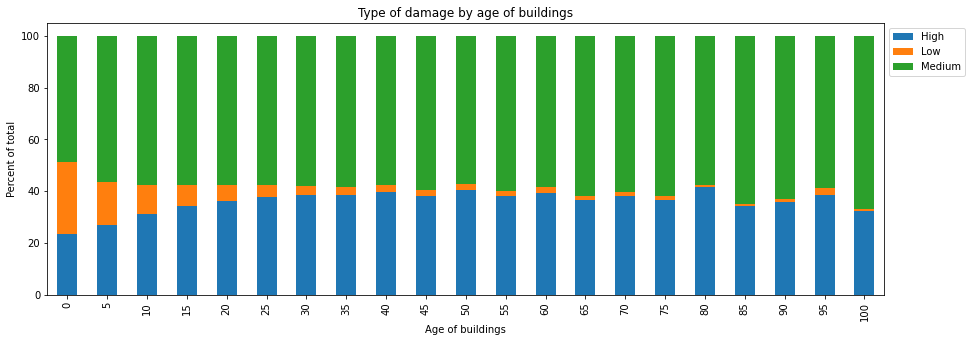

In [38]:
#Create a crosstab- this step is required to get data in the format suitable for required type of chart
data_crosstab=pd.crosstab(index=data_group_age_damage['age'],columns=data_group_age_damage['damage_grade'], values=data_group_age_damage['count'], aggfunc='sum',normalize='index')*100

# Plot the data and set labels
data_crosstab.plot(kind='bar',stacked=True,title='Type of damage by age of buildings');
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Percent of total')
plt.xlabel('Age of buildings')
plt.show()

- damage type 2 is common type of damage. Only age 0 have damage type 3 less than damage type 1, other age building have damage type 3 more than damage type 1.
- older building could not stand to earthquake as they tend to damage type 2 and type 3 more.

# Q3 : How can the type of superstructures used in the building be one of the factors to find the patterns? #
### Impact of building structure on the damage caused. ###

In [39]:
# list of structure related colmns
cols=['has_superstructure_adobe_mud',
      'has_superstructure_mud_mortar_stone',
      'has_superstructure_stone_flag',
      'has_superstructure_cement_mortar_stone',
      'has_superstructure_mud_mortar_brick',
      'has_superstructure_cement_mortar_brick', 
      'has_superstructure_timber',
      'has_superstructure_bamboo', 
      'has_superstructure_rc_non_engineered',
      'has_superstructure_rc_engineered', 
      'has_superstructure_other']

# melt the columns
datamelt=data.melt(id_vars=['age','damage_grade'],value_vars=cols).rename(columns={'variable':'structure','value':'count'})
# print few rows of datamelt
print(datamelt[:10],"\n")

# Group by age, damage and structure
damage_by_structure=datamelt.groupby(['damage_grade','structure']).agg({'count':'sum'})

damage_by_structure.reset_index(inplace=True)
# print few rows of damage_by_structure
print(damage_by_structure[:10])

   age damage_grade                     structure  count
0   30         High  has_superstructure_adobe_mud      1
1   10       Medium  has_superstructure_adobe_mud      0
2   10         High  has_superstructure_adobe_mud      0
3   10       Medium  has_superstructure_adobe_mud      0
4   30         High  has_superstructure_adobe_mud      1
5   10       Medium  has_superstructure_adobe_mud      0
6   25         High  has_superstructure_adobe_mud      0
7    0          Low  has_superstructure_adobe_mud      0
8   15       Medium  has_superstructure_adobe_mud      0
9    0          Low  has_superstructure_adobe_mud      0 

  damage_grade                               structure  count
0         High            has_superstructure_adobe_mud   8470
1         High               has_superstructure_bamboo   5288
2         High  has_superstructure_cement_mortar_brick   1078
3         High  has_superstructure_cement_mortar_stone    669
4         High     has_superstructure_mud_mortar_brick   5300

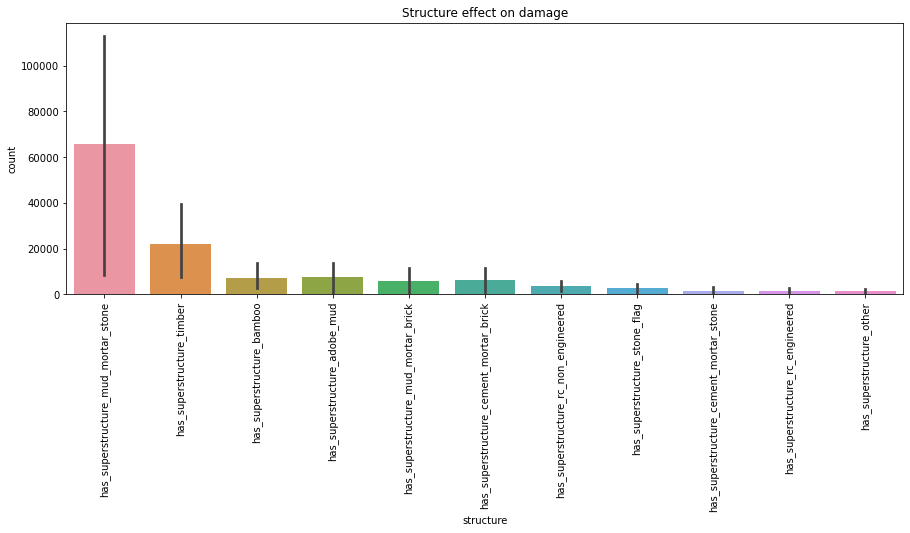

In [40]:
damage_by_structure.sort_values(by='count', ascending=False,inplace=True)
sns.barplot(x='structure',y='count',data=damage_by_structure)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('Structure effect on damage')
plt.show()

- Superstructure is the structual part of a building found above the foundation or basement. The type of materials used or found in the superstructure can be very telling about the kind of damage a building may have from an earthquake.
- structure made up of mud, timber, bamboo damaged most.
- least damaged type of structure are : has_superstructure_rc_engineered, has_superstructure_cement_mortar_stone

# Q4 : Which foundation type is the leading cause of damage grade? #
### Impact of building foundation type on the damage caused. ###

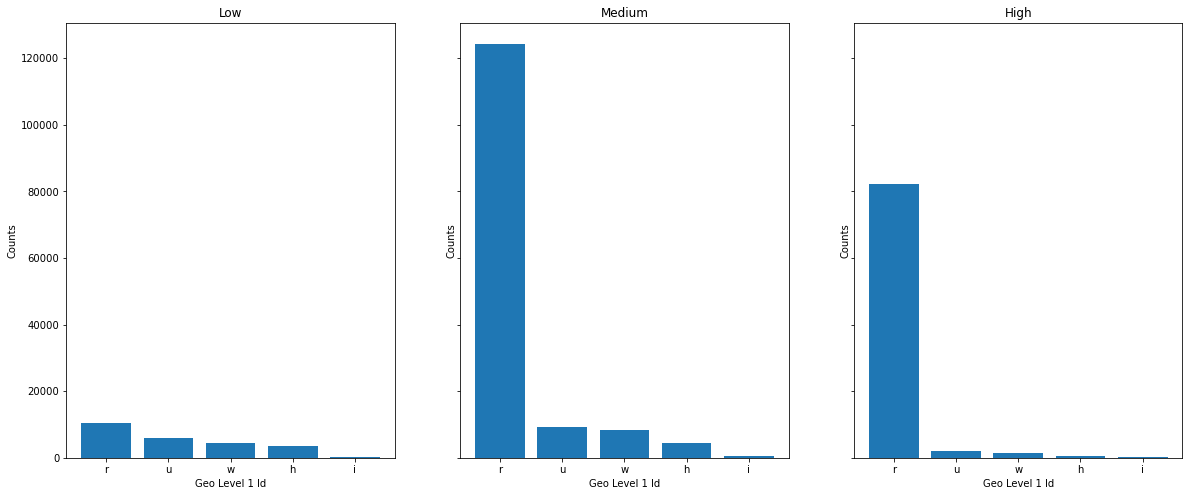

In [41]:
fig, axes = plt.subplots(1, 3, figsize = (20,8), sharex=True, sharey=True)
damage = ['Low','Medium','High']

for i, val in enumerate(damage):
    axes[i].bar(data[data['damage_grade'] == val]['foundation_type'].value_counts().index, data[data['damage_grade'] == val]['foundation_type'].value_counts().values)
    axes[i].set_title(val)
    axes[i].set_xlabel("Geo Level 1 Id")
    axes[i].set_ylabel("Counts")

plt.show()


- Buildings with foundation type __r__ have the highest number and have an influence on the level of damage that occurs in the building.

# Q5 : How is the area and height of buildings related to damage grade? #
### Area_percentage ###

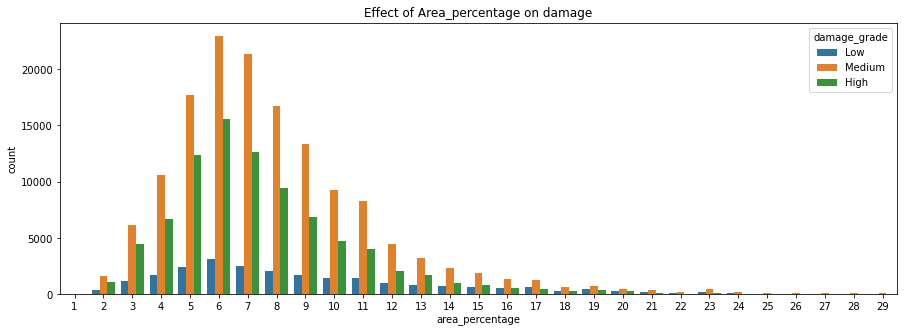

In [42]:
#plt.xlabel('Area percentage')
#plt.ylabel('count')
plt.title('Effect of Area_percentage on damage')
sns.countplot(x='area_percentage',data=data[data['area_percentage']<30], hue='damage_grade',hue_order=['Low', 'Medium', 'High'])
plt.show()


- Buildings having area percentage between 5 to 8 are more prone damage grade.
- It can be seen that many buildings have an area percentage from 2 to 20 and they suffered moderate damage from the earthquake. 

### Height Percentage ###

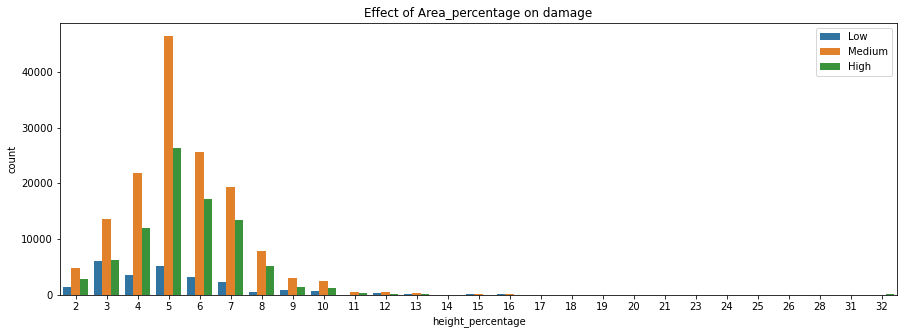

In [43]:
#plt.xlabel('Area percentage')
#plt.ylabel('count')
plt.title('Effect of Area_percentage on damage')
sns.countplot(x='height_percentage',data=data, hue='damage_grade',hue_order=['Low', 'Medium', 'High'])
plt.legend(loc= 'upper right')
plt.show()


- buildings having height percentage 5 are causing more damage.
- The building height percentage is in the range of 2 to 10 has moderate damage due to the earthquake.

# Q6 : Which kind of land surface type is more vulnerable to earthquakes? #
### Land surface condition ###

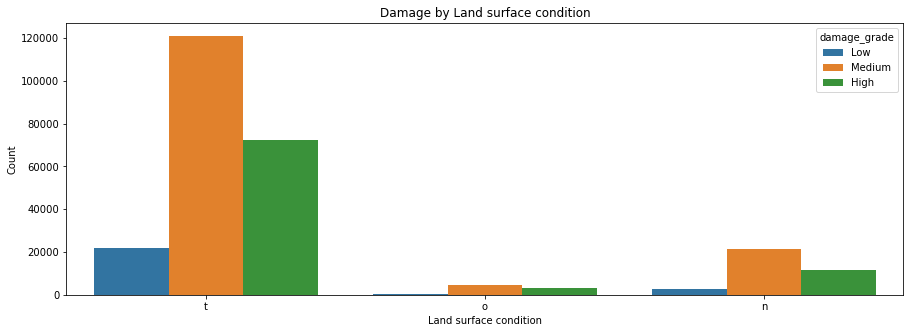

In [44]:
sns.countplot(data = data, x = 'land_surface_condition',hue = data['damage_grade'],hue_order=['Low', 'Medium', 'High'] )
plt.xlabel("Land surface condition")
plt.ylabel("Count")
plt.title("Damage by Land surface condition")
plt.show()

- Land surface type __t__ is more vulnerable to damage than other land surface type

# Q7 : Which roof type is more affected by earthquakes #
### Analysis on Roof type ####

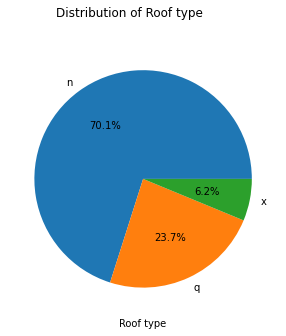

In [45]:
# pie chart to show distribution of roof type varible
fig, axs = plt.subplots()
fig.suptitle('Distribution of Roof type')
axs.pie(data.roof_type.value_counts(),labels=data.roof_type.unique(), autopct='%1.1f%%')
axs.set_xlabel('Roof type')
plt.show()

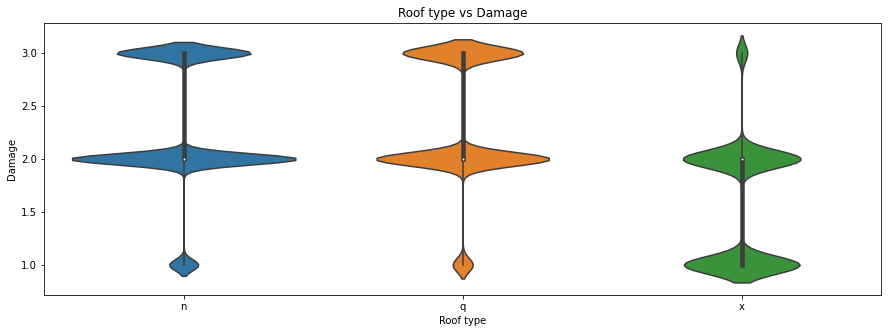

In [46]:
#Violin plot : shows the distribution of quantitative data across several levels of one (or more) categorical variables
# replace the damage_grade value into numerical
damage = data['damage_grade'].replace(['Low','Medium','High'],[1,2,3])

sns.violinplot(data = data, x='roof_type', y=damage)
plt.xlabel("Roof type")
plt.ylabel("Damage")
plt.title("Roof type vs Damage")
plt.show()

- Building having __Roof type 'x'__ have less effect of damage grade 3 than other Roof. 

## Q8 : How are families affected due to the earthquake? ##
### Anlayse number of floor and family count on damage grade ###

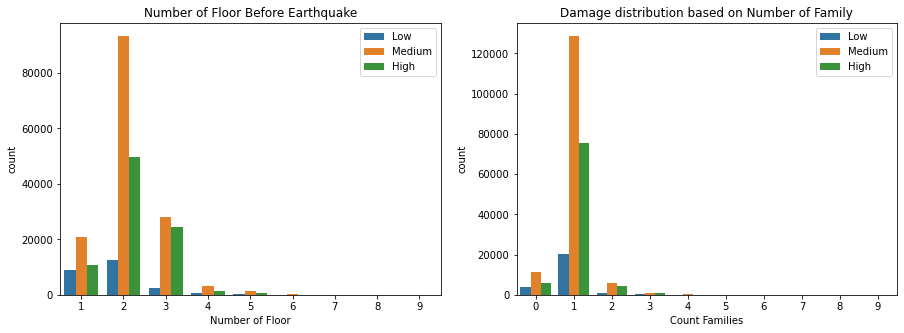

<Figure size 1296x360 with 0 Axes>

In [47]:
#Countplot for number of floor
fig, (ax1,ax2) = plt.subplots(1,2)
fig = plt.figure(figsize=(18,5))
sns.countplot(data['count_floors_pre_eq'],data=data,hue=data['damage_grade'], hue_order=['Low', 'Medium', 'High'], ax= ax1).set_title("Number of Floor Before Earthquake")
ax1.set(xlabel='Number of Floor')
ax1.legend(loc='upper right')


#Countplot for number of family
sns.countplot(data = data, x='count_families', hue=data['damage_grade'], hue_order=['Low', 'Medium', 'High'],ax = ax2).set_title("Damage distribution based on Number of Family")
ax2.set(xlabel='Count Families')
ax2.legend(loc='upper right')
plt.show()

- Buildings damaged by the earthquake have a range of floors, ranging from one to nine.
- It was observed that buildings with 2 floors suffered medium damage, followed by high and low damage
- This is also true for buildings with three floor and one floor.
- The majority of buildings affected by the earthquake are occupied by 0-2 people

## 2.2 Other trends ##
### Position ###

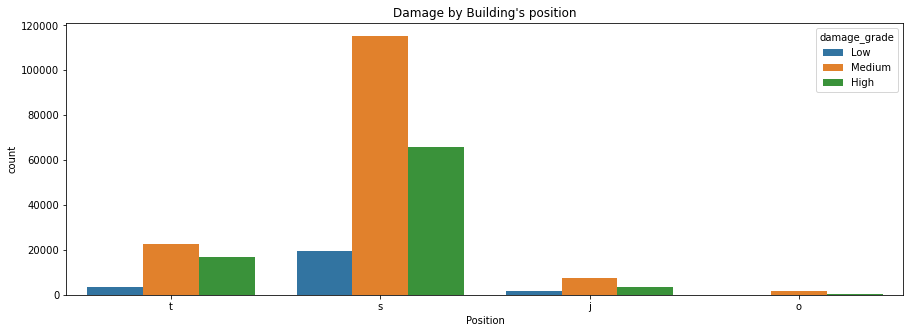

In [48]:
sns.countplot(data = data, x='position', hue='damage_grade', hue_order=['Low', 'Medium', 'High'])
plt.xlabel("Position")
plt.ylabel("count")
plt.title("Damage by Building's position")
plt.show()

- Building with position in __'s'__ suffer moderate to heavy damage.

### Plan_configuration ###

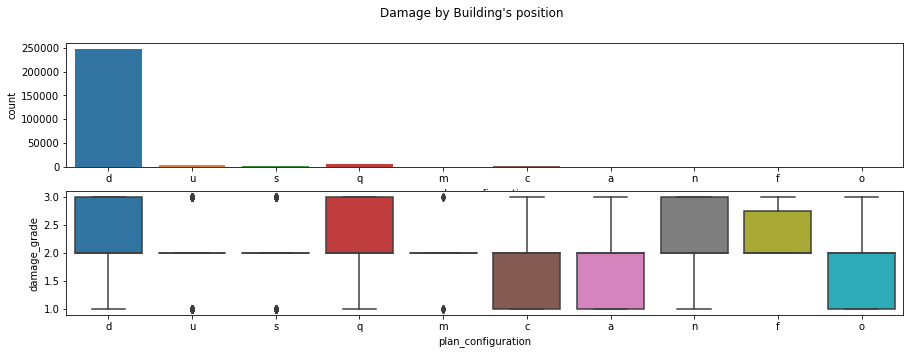

In [49]:
relation = data.copy()
relation['damage_grade'] = relation['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
relation['damage_grade'] = relation['damage_grade'].astype('int64')

fig, (ax1,ax2) = plt.subplots(2,1)
sns.countplot(data=data, x='plan_configuration', ax= ax1)
sns.boxplot(data = relation, x='plan_configuration', y ='damage_grade', ax = ax2)
fig.suptitle("Damage by Building's position")
plt.show()

- Buildings whose position is __d__ type have higher damage grade than other. Position type __q__, __n__, __f__ also have high damage grade.

### ground_floor_type ###

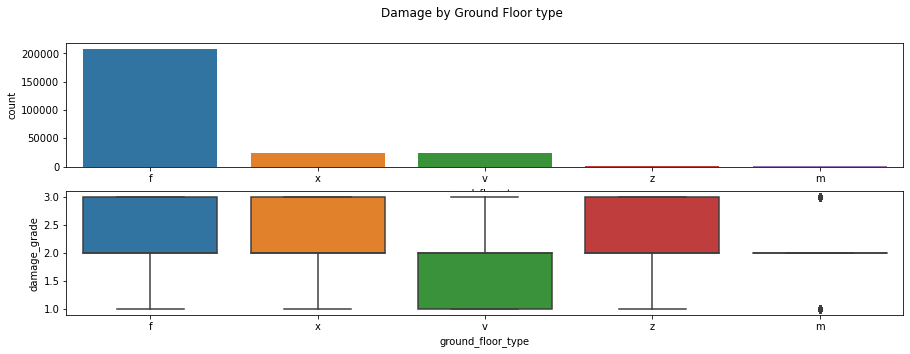

In [51]:
fig, (ax1,ax2) = plt.subplots(2,1)
sns.countplot(data=data, x='ground_floor_type', ax= ax1)
sns.boxplot(data = relation, x='ground_floor_type', y ='damage_grade', ax = ax2)
fig.suptitle("Damage by Ground Floor type")
plt.show()

- Ground type floor __f__, __x__, __z__ are more vulnerable to naturel disater compare to other.

### legal_ownership_status ###

v    96.29
a     2.12
w     1.02
r     0.57
Name: legal_ownership_status, dtype: float64


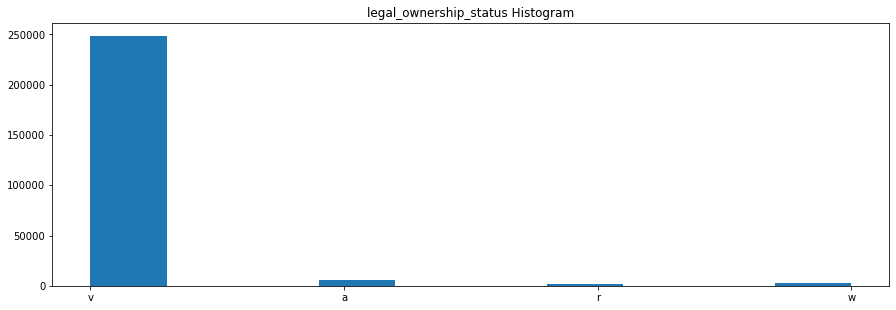

In [52]:
hist_frq(data, 'legal_ownership_status')

- 96% buildings owner type is __'v'__.

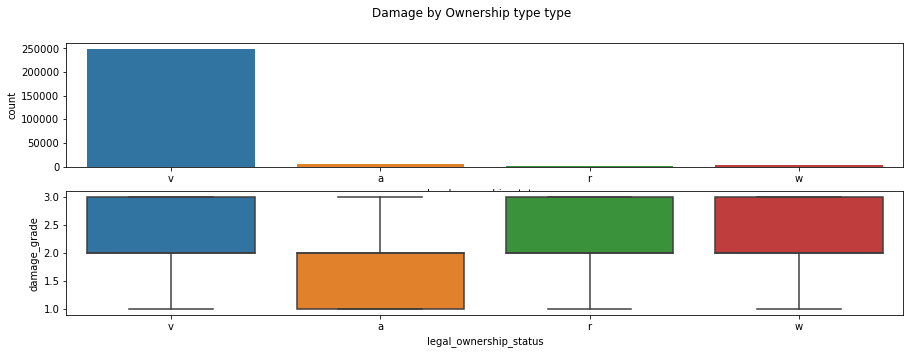

In [53]:
#counpot and box plot
fig, (ax1,ax2) = plt.subplots(2,1)
sns.countplot(data=data, x='legal_ownership_status', ax= ax1)
sns.boxplot(data = data, x='legal_ownership_status', y=damage, ax = ax2)
fig.suptitle("Damage by Ownership type type")
plt.show()

- Ownership type __a__ least vulnerable to naturel disater compare to other.

### secondary_use_list ###

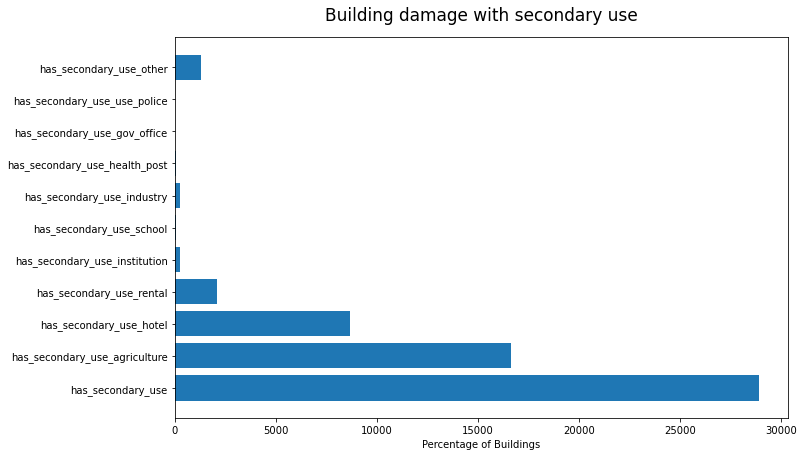

In [54]:
import matplotlib.ticker as ticker
secondary_use_list = ['has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel',
                      'has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school',
                      'has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office',
                      'has_secondary_use_use_police','has_secondary_use_other']

building_count= {}
for col in secondary_use_list:
    building_count[col]=round((data[col].value_counts()[1]))


x=list(building_count.keys())
y=list(building_count.values())
   
# Sets up figure , axes and draws bar plot
fig, ax = plt.subplots(figsize=(11,7))
ax.barh(x, y)
 
# Set axes labels and title
ax.set_xlabel('Percentage of Buildings',)
#ax.set_ylabel(ylabel, size=15)
ax.set_title('Building damage with secondary use', size= 17, pad=17)
plt.show()

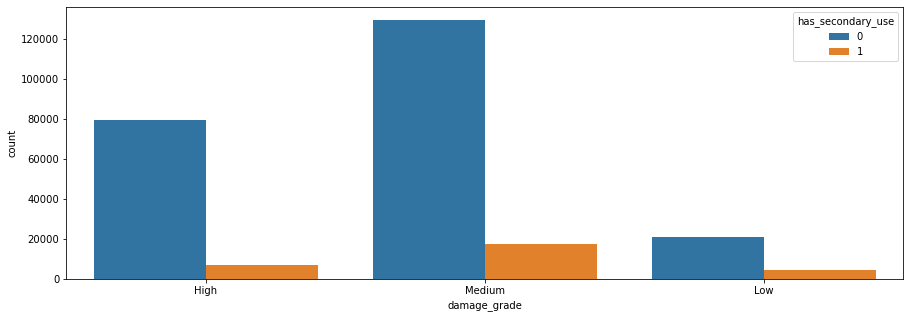

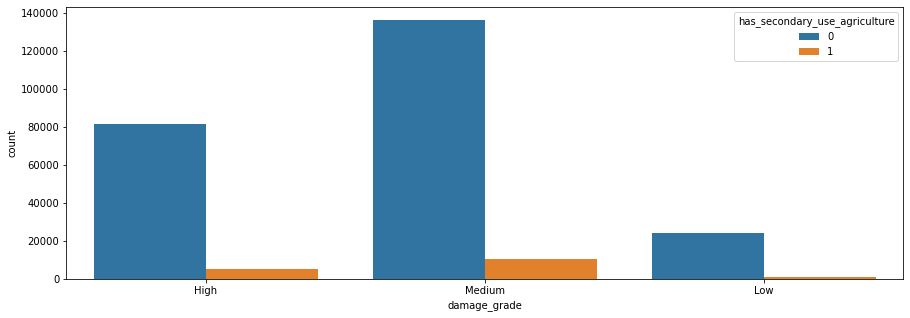

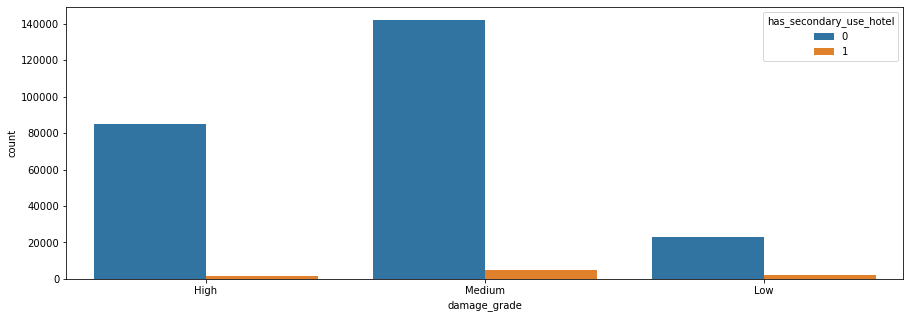

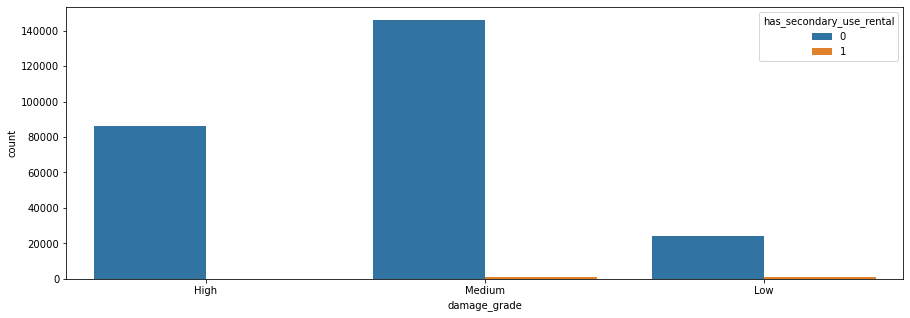

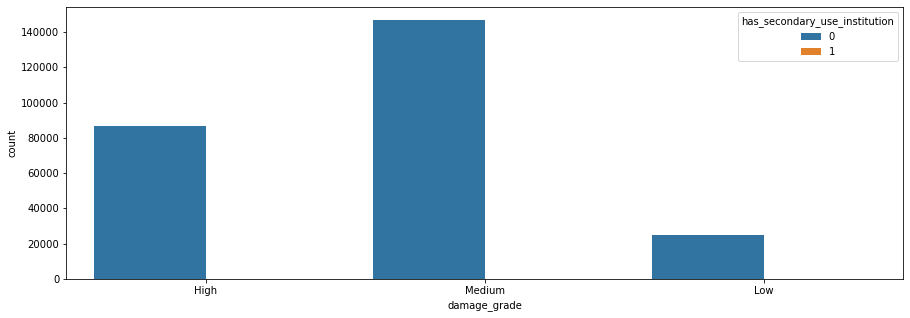

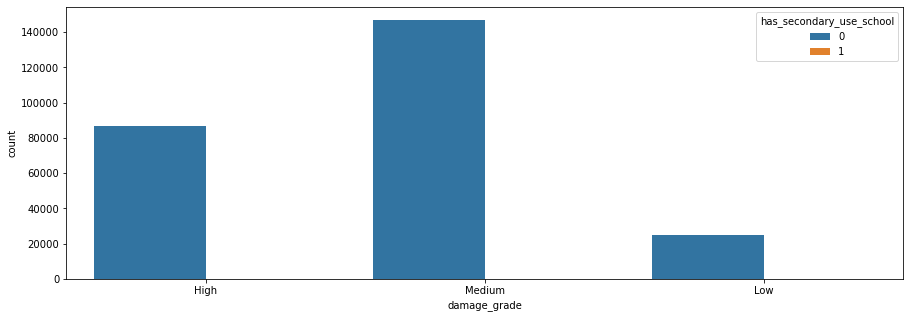

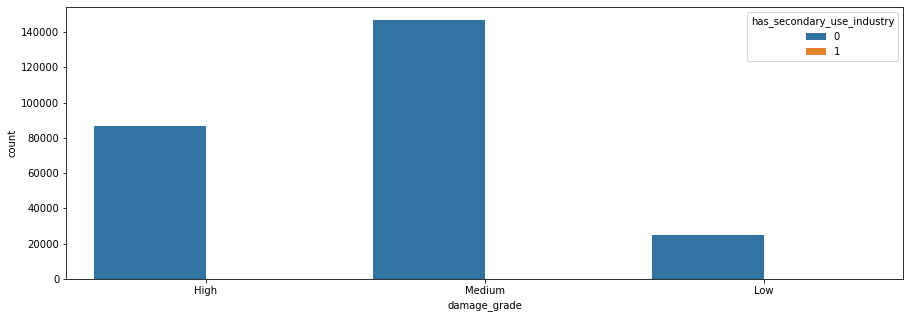

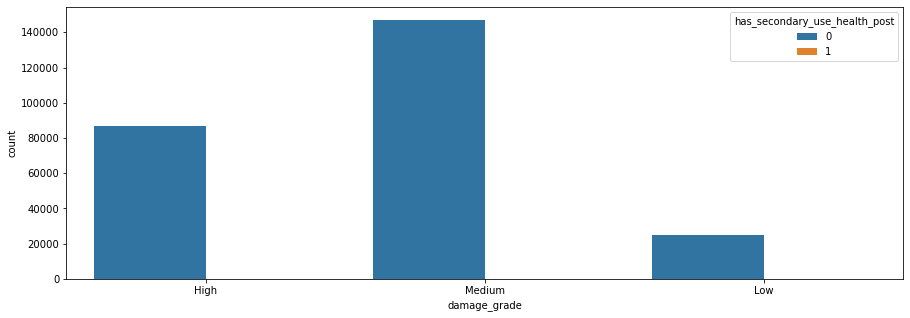

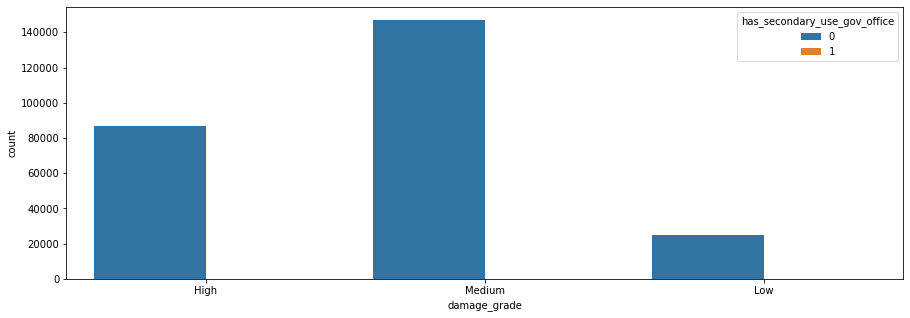

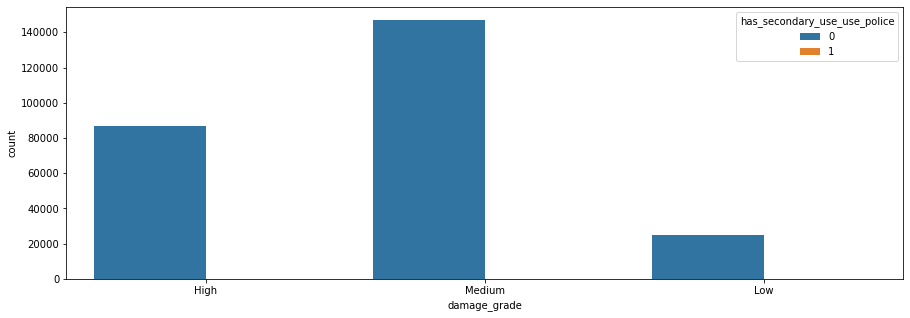

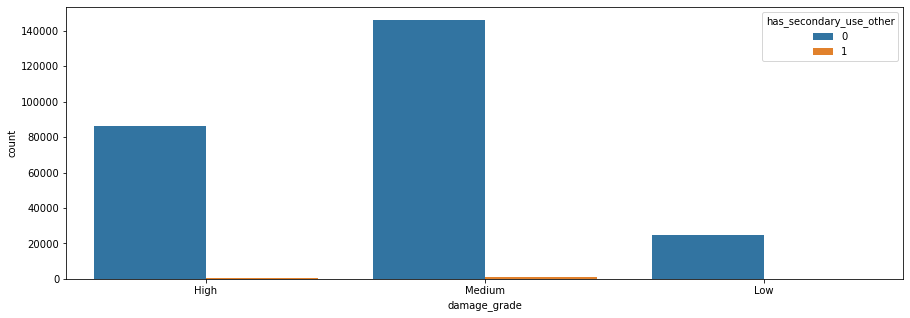

<Figure size 1080x360 with 0 Axes>

In [59]:
# countpot secondary use
for col in secondary_use_list:
    sns.countplot(x='damage_grade', hue=col, data=data)
    fig = plt.figure()

- There is no evidence that secondary use increase/decrease in damage grade of building. 

## Correlation ##

In [60]:
relation = data.copy()
relation['damage_grade'] = relation['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
relation['damage_grade'] = relation['damage_grade'].astype('int64')
corr = relation.corr()

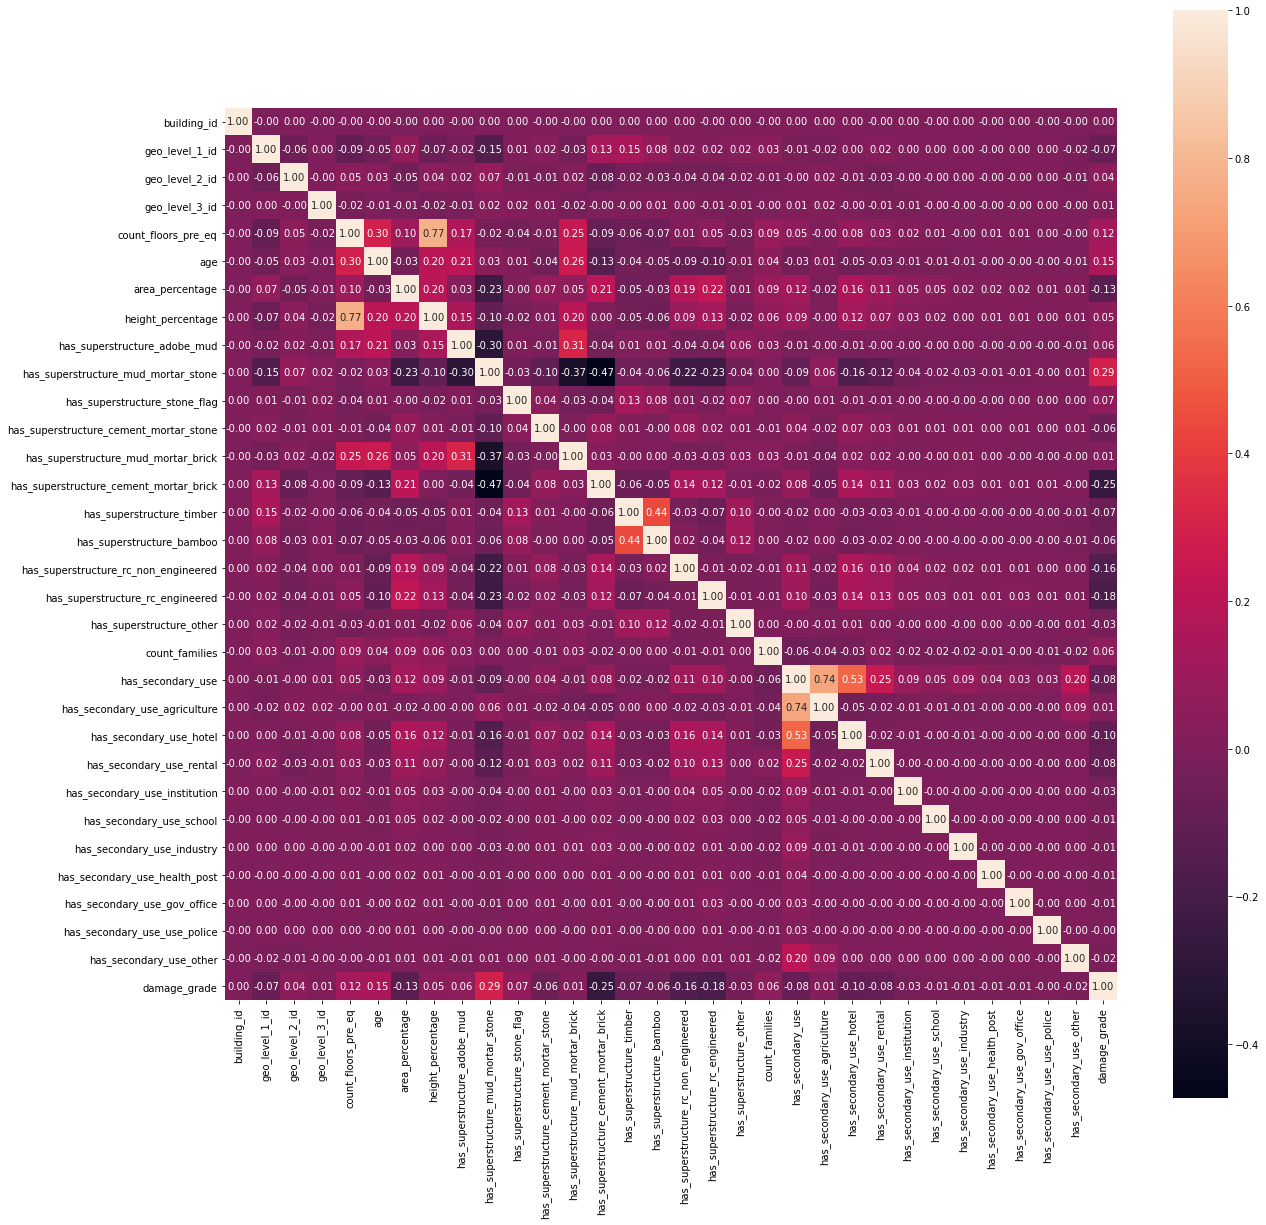

In [61]:
# heat map
plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True, cmap='rocket', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

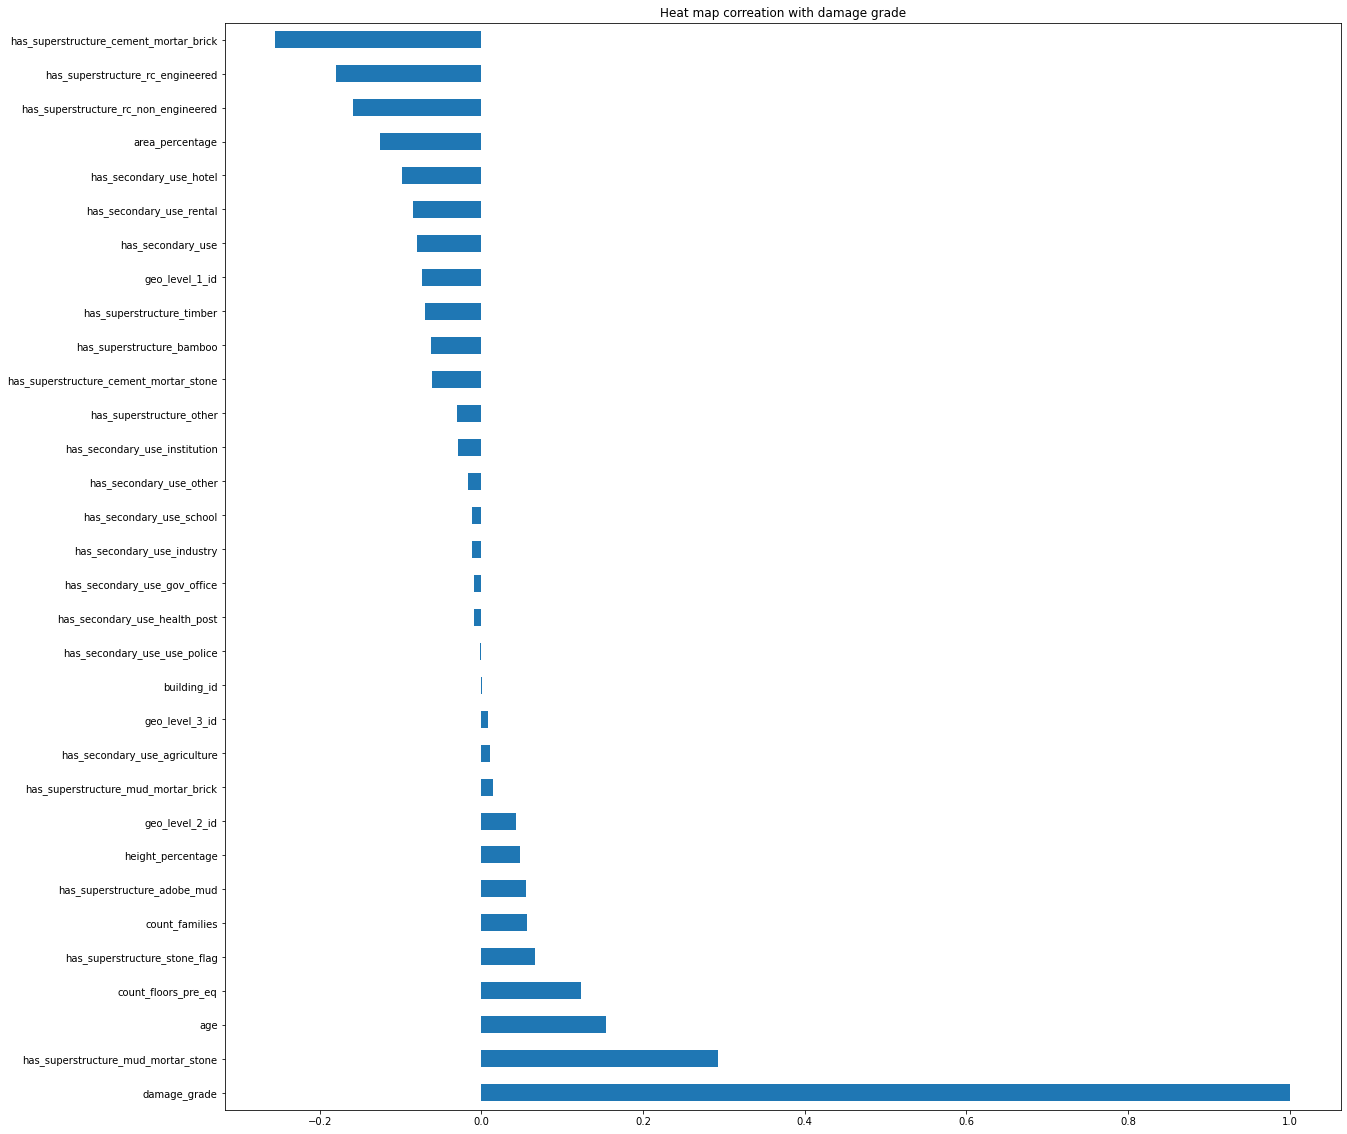

In [62]:
plt.figure(figsize=(20,20))
corr['damage_grade'].sort_values(ascending=False)
corr['damage_grade'].sort_values(ascending=False).plot(kind='barh')
plt.title("Heat map correation with damage grade")
plt.show()

- Based on the picture of the effect of building material features on the level of building damage, we will choose 4 material features that have the highest correlation level with damage_grade. 
- The 4 features are has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_brick, has_superstructure_rc_engineered, and has_superstructure_rc_non_engineered.
- Buildings that do not have a Reinforce Concrete Engineered superstructure often experience moderate and high levels of damage.
- The number of buildings using the Non Engineered Reinforce Concrete superstructure experienced a moderate level of damage more than the number of buildings using the Reinforce Concrete Engineered superstructure
- Buildings that use the Cement Mortar Brick superstructure suffer less damage than those that don't.

__based on this one can recomend :__
   - Use of the Reinforce Conrete Engineered superstructure
   - Use of the Cement Mortar Brick super superstructure

- buildings that experienced the highest level of damage were buildings have following criteria :
    - Buildings with 2 floors
    - 0-50 years old building
    - Building with normalized area 3-11
    - Building with normalized height 2-9
    

__Therefore, we can provide recommendations for the characteristics of the building (house) :__
 - Buildings with 1 or 3 floors
 - Buildings with normalized height less than 3 or more than 9
 - Buildings with normalized area less than 4 or more than 10